In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import numpy as np
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from math import sqrt

In [2]:
prices_df = pd.read_csv("C:\k.v.singh\SJSU\Fall_2019\CMPE257\machine-learning-stock-market\one_year_data.csv", index_col=[0], parse_dates=[0])
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
print (returns.columns)
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)

Index(['Returns'], dtype='object')


In [3]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(cleaned_data) 

print(X_scaled)
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head() 

[[ 5.85680280e-01 -1.03495128e+00]
 [ 9.93210990e-01 -8.32506076e-01]
 [ 1.28596977e+00 -3.37270993e-01]
 [ 1.67774976e+00  4.30901367e-01]
 [ 5.10845749e-01 -9.19912572e-01]
 [ 1.90749535e+00  1.20778909e+00]
 [ 1.71884922e+00  1.22295383e-01]
 [-4.53135420e-01  4.63859222e+00]
 [-2.82383761e+00  2.29738806e+00]
 [-9.95890877e-01  4.56402693e-02]
 [ 8.61237295e-01 -2.19048158e-01]
 [ 3.02267505e-01 -1.15544286e+00]
 [ 9.45932415e-01 -5.06166409e-01]
 [-1.11432714e-01 -8.32706513e-01]
 [-6.75706711e-01  1.54998298e+00]
 [-1.39866502e+00  8.52172512e-01]
 [ 1.05152887e+00  4.20894836e-01]
 [ 3.05938438e-02 -8.49995203e-01]
 [-6.48796540e-01  1.37490176e+00]
 [ 3.24286598e+00  1.69912346e+00]
 [ 2.38103072e-01 -4.07630942e-01]
 [-1.91962323e+00  4.38126010e-02]
 [-2.51919214e-01  4.17514271e-01]
 [-2.03311375e-01 -1.02579901e+00]
 [ 8.29924199e-01 -9.76020791e-01]
 [ 4.85866498e-01 -6.75537404e-01]
 [ 5.80935900e-01 -6.51745116e-01]
 [-4.54671097e-01 -5.13624786e-01]
 [ 1.31621783e+00  3

,P1,P2
0,-0.751535,-0.371745
1,-0.869473,-0.035517
2,-0.842228,0.401175
3,-0.585277,0.832954
4,-0.747531,-0.378730


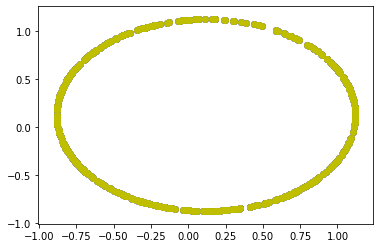

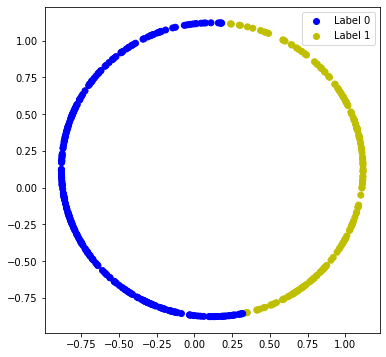

In [4]:
#Building the cluster model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal) 
# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_rbf] 
  
# Plotting the clustered scatter plot 
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b,y), ('Label 0', 'Label 1')) 
#plt.gca().legend(('Label 0', 'Label 1')) 
#plt.show() 

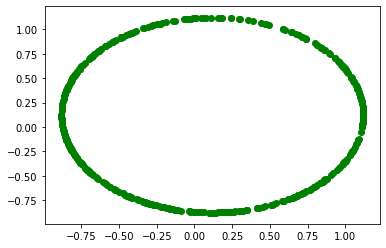

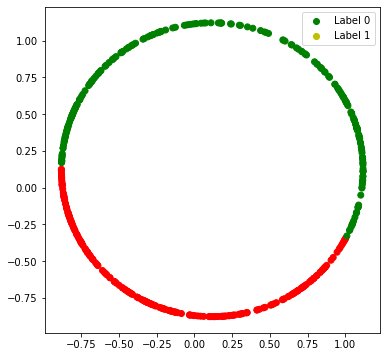

In [5]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal) 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'g'
colours[1] = 'r'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_nn] 
  
# Plotting the clustered scatter plot 
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
#y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b, y), ('Label 0', 'Label 1')) 
plt.show() 

In [6]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(cleaned_data, labels_rbf)) 
s_scores.append(silhouette_score(cleaned_data, labels_nn)) 
  
print(s_scores) 

[0.38975144724206806, 0.13871080928827884]


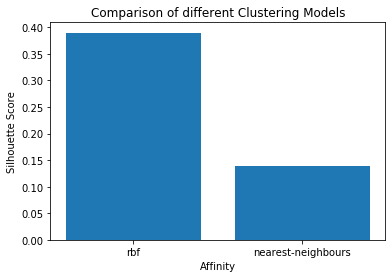

In [7]:
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 